# Example

Below I give a simple example to get you started with Pandas.

In [94]:
# initial imports and setup
%matplotlib inline
# import pandas as pd
import scipy.constants
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import scipy as sp
from scipy.optimize import minimize
from matplotlib.patches import Ellipse
import scipy.interpolate as interpolate

**0.1 Poisson Processes**

**a)** If p$\Delta t$ is the probability that someone arrives within the small time interval
$\Delta t$, then what is the probability that no one arrives within this small time
interval?

$P(0,t_0 + \Delta t, t_0) = 1 - p \Delta t $

**b)** Express the probability $P(n; t+\Delta t; t_0)$ in terms of probabilities $P(n - 1; t; t_0)$ and $P(n; t; t_0)$.

$$
P(n; t+\Delta t; t_0) = p\Delta t P(n - 1; t; t_0) + (1 - p\Delta t ) P(n; t; t_0)
$$

**c)** Derive from this expression the differential equation

$$ 
\frac{\partial}{\partial t} P(n; t; t_0) = -pP(n; t; t_0) + pP(n - 1; t; t_0)
$$

from **b)**

$$
P(n; t+\Delta t; t_0) - P(n; t; t_0) = p\Delta t P(n - 1; t; t_0) - p\Delta t P(n; t; t_0)
$$

so

$$
\frac{1}{\Delta t} \left[ P(n; t+\Delta t; t_0) - P(n; t; t_0) \right] = p P(n - 1; t; t_0) - p P(n; t; t_0)
$$

with $\lim_{\Delta t \rightarrow 0}$

$$
\frac{1}{\Delta t} \left[ P(n; t+\Delta t; t_0) - P(n; t; t_0) \right] = \frac{\partial}{\partial t} P(n; t; t_0)
$$

so

$$
\frac{\partial}{\partial t} P(n; t; t_0) = - p P(n; t; t_0) + p P(n - 1; t; t_0)
$$

**d)** Now also express the probability $P(0; t+\Delta t; t_0)$ of having no visitors in
terms of probabilities at time t, and derive from this the differential equation
$$
\frac{\partial}{\partial t} P(0; t; t_0) = -p P(0; t; t_0)
$$

the probability of zero guest at $t + \Delta t$ is given by

$$
\begin{aligned}
P(0,t + \Delta t, t_0) &= (1 - p\Delta t)^{\frac{t + \Delta t}{ \Delta t }}\\
&= (1 - p\Delta t)^{\frac{t}{ \Delta t }}(1 - \Delta t) \\
& = (1 - p\Delta t)^{\frac{t}{ \Delta t }} - \Delta t(1 - p\Delta t)^{\frac{t}{ \Delta t }}\\
&= P(0,t, t_0) - p\Delta  P(0,t, t_0) 
\end{aligned}
$$

rearranging this

$$
\frac{1}{\Delta t} \left[P(0,t + \Delta t, t_0) - P(0,t,t_0)\right] = -p P(0,t,t_0)
$$

with $\lim_{\Delta t \rightarrow 0}$

$$
\frac{1}{\Delta t} \left[P(0,t + \Delta t, t_0) - P(0,t,t_0)\right] = \frac{\partial}{\partial t} P(0; t; t_0)
$$

so

$$
\frac{\partial}{\partial t} P(0; t; t_0) = -p P(0,t,t_0)
$$


**e)** Use the ansatz $P(n; t; t_0) = A_{n}(t)\exp{(p(t-t_0))}$ to derive that
$$
P(n; t; t_0) = \frac{(p(t - t_0))^{n}}{n!} \exp{(p(t-t_0))}
$$
are the solutions for the differential equations 1 and 2 that agree with the
initial conditions.

For simplicity we start with $P(n,T)$ as the probability of n guests at time $T$ after $t_0 = 0$ so $T=t-t_0$

from $(2)$

$$
\frac{\partial}{\partial T} P(0,T) = -p P(0,T)
$$

so

$$
\int \frac{1}{P(0,T)}\frac{\partial}{\partial T} P(0,T) \partial T = \int -p \partial T
$$

$$
\Rightarrow \log{(P(0,T))} = -pT + C_0
$$

at $T=0$ (ie $t=t_0$), $P(0,0) = 1$ $\Rightarrow$ $C_0 = 0$ so $P(0,T) = \exp{(-p T)}$

from $(1)$

$$
\frac{\partial}{\partial T} P(1,T) = p P(0,T) - p P(1,T)
$$

using $P(0,T) = \exp{(-p T)}$

$$
\frac{\partial}{\partial T} P(1,T) - p P(1,T) = p \exp{(-p T)}
$$

$$
\frac{\partial}{\partial T} \left[\exp{(p T)} P(1,T) \right] = p
$$

$$
\exp{(p T)} P(1,T) = p T + C_1
$$

again, from the initial, we see $C_1 = 0$ so

$$
P(1,T) = p T \exp{(- p T)}
$$

similarly
$$
P(2,T) = \frac{(pT)^{2}}{2!} \exp{(-p T)} \\
P(3,T) = \frac{(p T)^{3}}{3!} \exp{(-p T)}\\
\vdots \\
P(n,T) = \frac{(p T)^{n}}{n!} \exp{(-p T)}
$$

substituting back for $T$ we have
$$
P(n,t, t_0) = \frac{(p (t-t_0))^{n}}{n!} \exp{(-p (t-t_0))}
$$

**f)** Derive from equation 3 the average/expected number of visitors coming
to your party between time $t_0$ and $t$.

Using the taylor expansion of the exponential function for an arbitrary variable

$$
\begin{aligned}
\mathbb{E}[n] &= \sum_{n=0}^{\infty} n P(n,t,t_0) \\
& = \exp{(-p(t-t_0))} \sum_{n=1}^{\infty} \frac{(p (t-t_0))^{n}}{n!}\\
& = (p (t-t_0))\exp{(-p(t-t_0))} \sum_{n=1}^{\infty} \frac{(p (t-t_0))^{n-1}}{n!}\\
& = (p (t-t_0))\exp{(-p(t-t_0))} \exp{(p(t-t_0))}\\
& = p (t-t_0)\\
\end{aligned}$$

**g)** Derive from equation 3 the most likely number of visitors coming to your
party, i.e. the number n where $P(n; t; t_0) > P(n-1; t; t_0)$ and $P(n; t; t_0) >
P(n + 1; t; t_0)$.

This value is given by the nearest integer to the expected value so $\lceil p(t-t_0)\rceil - 1$ or $\lfloor p(t-t_0)\rfloor$

**h)** Divide a period of 60 minutes into steps of t = 1 minute. For each
step determine randomly if someone arrives according to probability pt
and count the number of visitors after 60 minutes. Repeat this procedure
10000 times and plot the distribution of visitors after 60 minutes in a
histogram.

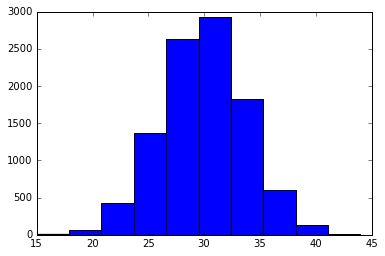

In [6]:
p = 0.5
tstep = 60 #seconds time step
tmax = 3600 #seconds time max

def simulateUniform(tstep, tmax, p, n):
    all_ns = np.random.rand(n,int(tmax/tstep))
    all_ns = all_ns - (1-(tstep/60)*p)
    all_ns = np.ceil(all_ns)
    ns = np.sum(all_ns, axis=1)
    plt.hist(ns, bins=10)
    plt.show()

    
simulateUniform(tstep,tmax,p,10000)

            
    

**i)** Now divide the period of 60 minutes into steps of t = 1 second and
plot the distribution again. Also draw the Poisson distribution that you
expect. Why are the two simulated distributions not the same? Which
one is more accurate? And why?

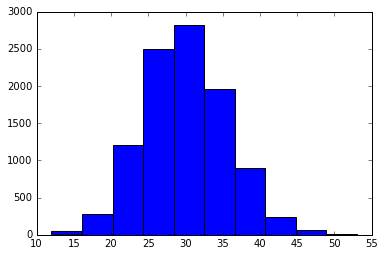

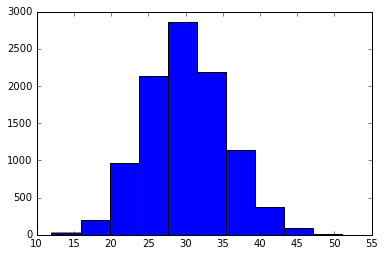

In [7]:
tstep = 1
simulateUniform(tstep,tmax,p,10000)

samples = np.random.poisson(p*(tmax/60),10000)
plt.hist(samples,bins=10)
plt.show()


The difference between the distributions can be explained by the fact that the first is a uniform distribution and the second is a Poisson distribution. ACCURATE WRT TO WHAT?

**j)** Show that the probability for getting the nth visitor at time t is

$$dtP (t; n; t_{0}) = dt
\frac{p(p(t - t_{0}))^{n-1} e^{p(t-t_{0})}}{(n - 1)!}$$

Here $\Delta$t is the expression for $\Delta$t as it becomes infinitesimally small.

**k)** What is the average time it takes for the rst visitor to arrive (derive this).

**l)** Write down the probability that starting from t0 the rst visitor arrives at
time t1 AND from that moment t1 the next visitor arrives at time t2.
Now allow the time that the rst visitor arrives to be anywhere between t0
and t2 by integrating the probability over t1 between t0 and t2, and show
that the result is the same as P(t2; 2; t0) the probability of the second
visitor arriving at time t2.

**m)** Use the exponential PDF pe􀀀pt with p = 0:5 to generate random times
until their sum is larger than 60 minutes. The number of visitors that
arrived in the 60 minutes is one less than generated. Repeat this procedure
10000 times and plot the number of visitors in 60 minutes in a histogram.
Compare with the previous simulations and with the expected Poisson
distribution.

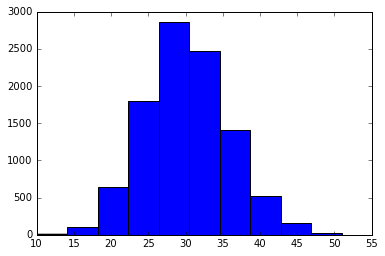

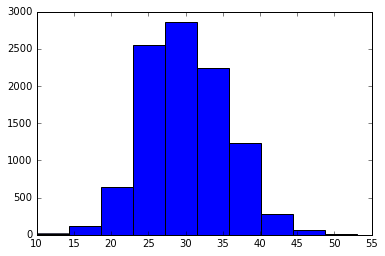

In [199]:
def simulateExponential(p,n,tmax):
    cs = []
    for i in range(0,n):
        t = 0
        c = 0
        while(t < tmax/60):
            t+= np.random.exponential(scale=1/p, size=1)
            c +=1
        cs.append(c-1)
    return cs

p = 0.5
n = 10000
tmax = 3600 # in minutes

cs = simulateExponential(p,n,tmax)
plt.hist(cs)
plt.show()

samples = np.random.poisson(p*(tmax/60),10000)
plt.hist(samples,bins=10)
plt.show()

The distributions look very similar.

**n)** How many random times did you generate in total? How does this compare
to the total number of steps that you previously simulated for t = 1
second?

In [ ]:
print("Times generated:", sum(cs))
print("Steps generated uniform:",tmax*n)

We had to compute significantly less steps using this method compared to the previous method.

**o)** Write down the probability that the nth visitor arrives at time tn AND
no more customers come in after that between time tn and t. Now allow
the time tn where the nth visitor arrives to be anywhere between t0 and
t by integrating the probability over tn between t0 and t, and show that
the result is the same as P(n; t; t0) the probability of having n visitors
between t0 and t.

**0.2 Time dependent rate**

**a)** The previously derived Poisson and Gamma distributions all involved the
quantity p  (t 􀀀 t0). This is the integral of constant p over time from t0
to t. Knowing this, write down the algebraic solutions P(n; t; t0) to the
dierential equations when the rate is not constant.

**b)** What is the probability of no one coming, ever ('ever' is t ! 1)? Under
what circumstances is this probability not zero? Can this happen with a
constant rate?

**c)** And write down P(t; n; t0) the probability of getting the nth visitor at
time t in this case.

**d)** Starting from t0 the probability of getting your rst visitor at time t is
p(t)e􀀀
R t
t0
dsp(s). Write down the probability that starting from t0 the rst
visitor arrives at time t1 AND from that moment t1 the next visitor arrives
at time t2. Integrate this probability over t1 between t0 and t2 and show
that the result is the same as P(t2; 2; t0) the probability of the second
visitor arriving at time t2.

**e)** Make a plot of the function p(t)e􀀀
R t
t0
dsp(s), with t0 at 18:00, and p(t)
given by the hourly rates from table 1. This is the distribution of times
where your rst visitor arrives. You don't have to work with actual times,
it is also ne to work with e.g. the number of minutes since 18:00 to avoid
the horrible datetime libraries. This plot will serve as a check for your
simulation to come.

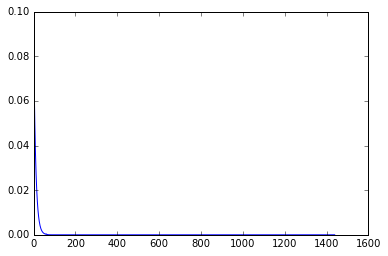

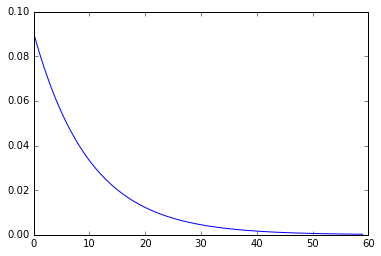

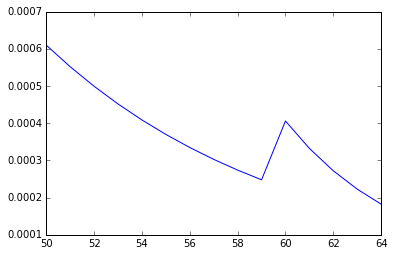

In [203]:
pt = [0.1,0.2,0.3,0.4,0.5,0.6,0.3,0.1]
tStart = [0,60,120,180,240,300,360,420]
#TEnd = [960,1020,1080,1140,1200,1260,1320,1380,1440]


def simulateTimes(pt, tStart,n, ptStart, plot = True, duration=24*60):
    n = n-1
    integr = 0
    ps = []
    for i in range(ptStart,duration):
        p = 0
        if i < 60 + tStart[len(tStart)-1]:
            p = pt[int(np.floor(i/60))]
            integr += p
            #print(i, p*np.exp(-integr))
        ps.append((p*math.pow(integr,n)*np.exp(-integr))/sp.misc.factorial(n))
    if(plot == True):
        plt.plot(range(0,24*60-ptStart), ps)
        plt.show()
        plt.plot(range(0,60), ps[0:60])
        plt.show()
        plt.plot(range(50,65), ps[50:65])
        plt.show()
    
    return ps

ps = simulateTimes(pt,tStart,1, 0)    

**f)** Make a plot of the function p(t)
R t
t0
dsp(s)
9
e􀀀
R t
t0
dsp(s)=9!, with t0 at
18:00, and p(t) given by the hourly rates from table 1. This is the distri-
bution of times where your 10th visitor arrives. This plot will also serve
as a check for your simulation to come.

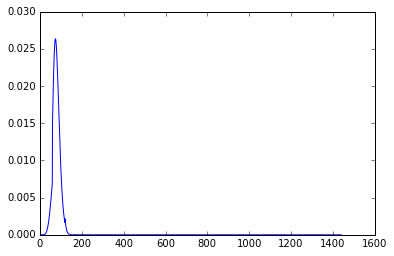

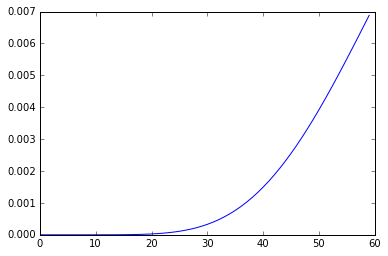

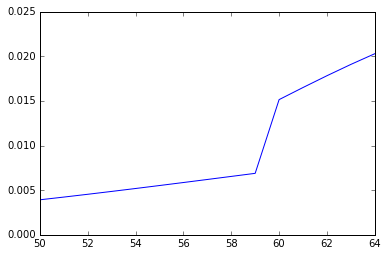

0.000691717419481


In [214]:
ps = simulateTimes(pt,tStart,10,0)


**g)** Build a random number generator for p(t)e􀀀
R t
t0
dsp(s) as indicated above,
using the hourly rates from table 1. Note that t0 the point from which on
you generate your next visitor is not xed but is the time that your last
visitor arrived, so pay attention to that in your generator.

In [205]:
def randomGenerator(pt, tStart, ptStart, rate):
    x = np.random.rand()
    n = 1
    ps = simulateTimes(pt, tStart,n, ptStart, False, 60)
    return (-1.0/rate)*np.log(1-x)

randomGenerator(pt, tStart, 0, pt[0])
    
    

22.958027349773342

**h)** Start from 18:00 and generate visitors arriving by generating random times
until you pass 02:00 at night. Repeat this procedure 1000 times. Each
time remember the time the first visitor arrived, the time the 10th visitor
arrived and the total number of visitors. Make a histogram of the arrival
time of the first visitor, and a histogram of the arrival time of the 10th
visitor. Compare these to the plots you made before of the distributions for
these to ensure you have built your simulation properly. Then also make
a histogram of the total number of visitors. What is the average/expected
number of visitors to your party from your simulation? What does the
probability distribution (Poisson distribution) say the average should be?

The plots have a similar shape to the ones that we have made before. The average/expected number of visitors from the simulation is around 185, the Poisson distribution says the average should be about 150.

In [234]:
def simulateRandom():
    ptStart = 0
    first = 0
    tenth = 0
    total = 0
    ptStart = 0
    i = 0
    while(ptStart < 10*60):
        rate = 0
        if ptStart >= 60*(len(pt)):
            break
        rate = pt[int(ptStart/60)]
        
        t = int(randomGenerator(pt, tStart, ptStart, rate))
        ptStart += t
        total += 1
        if(i == 0):
            first = ptStart
        if(i == 9):
            tenth = ptStart
        i+=1
    return first, tenth, total

firstTimes = []
tenthTimes = []
totalTimes = []
for i in range(0,1000):
    first, tenth, total = simulateRandom()
    firstTimes.append(first)
    tenthTimes.append(tenth)
    totalTimes.append(total)
    

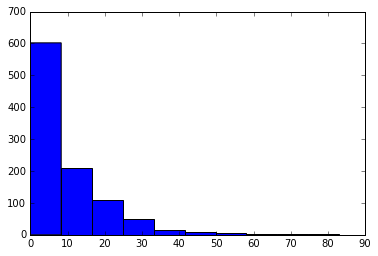

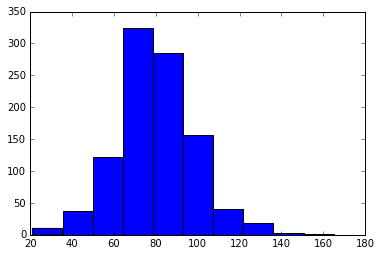

185.732


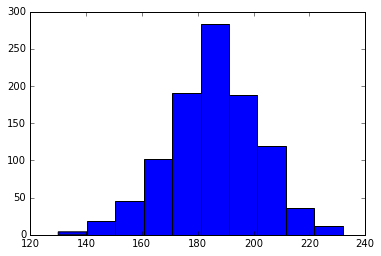

In [235]:
plt.hist(firstTimes)
plt.show()

plt.hist(tenthTimes)
plt.show()

print(np.mean(totalTimes))

plt.hist(totalTimes)
plt.show()

**0.3 State dependent rate**

**a)** Starting from any time t0 the probability that the next visitor arrives
at time t is still an exponential, but is in this case p(n; t)e􀀀
R t
t0
dsp(n;s).
Explain/interpret this exponential distribution.

**b)** Starting from t0, write down the probability of getting your rst visitor
at time t1 AND from that moment t1 the second visitor at time t2.

**c)** Formally when you integrate this probability over t1 between t0 and t2,
you end up with P(t2; 2; t0) the probability for having the second visitor
arrive at time t2 (and the rst somewhere between t0 and t2). However the
integral does not work out nicely. Why does it not work out to a similar
expression, the Gamma distribution of equation 4, as in the previous cases?

**d,e)** Build a random number generator for pn(t)e􀀀
R t
t0
dspn(s). For pn(t) use the
hourly rates from table 1 multiplied by
e􀀀0:05(n􀀀100)
1 + e􀀀0:05(n􀀀100)
5
I.e. when you have over 100 visitors then people are less and less likely to
come in.

In [245]:
def simulateRandom2():
    ptStart = 0
    first = 0
    tenth = 0
    total = 0
    ptStart = 0
    i = 0
    while(ptStart < 10*60):
        rate = 0
        pt2 = np.array(pt) * (np.exp(-0.05*(total-100))/(1+np.exp(-0.05*(total-100))))
        #print(pt2)
        if ptStart >= 60*(len(pt)):
            break
        rate = pt2[int(ptStart/60)]
        t = int(randomGenerator(pt, tStart, ptStart, rate))
        ptStart += t
        total += 1
        if(i == 0):
            first = ptStart
        if(i == 9):
            tenth = ptStart
        i+=1
    return first, tenth, total

firstTimes = []
tenthTimes = []
totalTimes = []
for i in range(0,1000):
    first, tenth, total = simulateRandom2()
    firstTimes.append(first)
    tenthTimes.append(tenth)
    totalTimes.append(total)

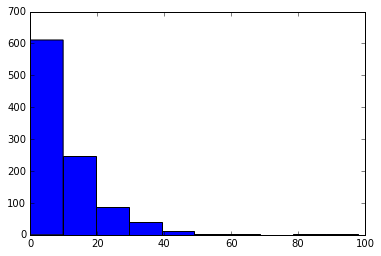

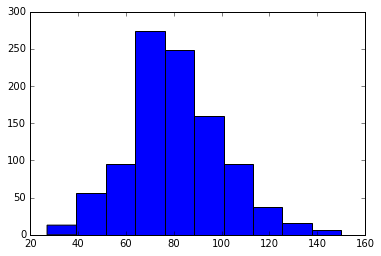

120.531


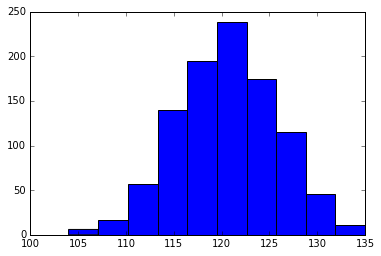

In [246]:
plt.hist(firstTimes)
plt.show()

plt.hist(tenthTimes)
plt.show()

print(np.mean(totalTimes))

plt.hist(totalTimes)
plt.show()

**e)** Start from 18:00 and generate visitors arriving by generating random times
until you pass 02:00 at night. Repeat this procedure 1000 times. Each
time remember the total number of visitors. Then make a histogram of
the total number of visitors. What is the average/expected number of
visitors to your party from your simulation?